# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.

**You must use quantitative visualizations (boxplots or histograms) when comparing quantitative features.  DO NOT categorize quantitative features.**

2.5 Visualizing Relationships Between Groups

In [41]:
import pandas as pd

df = pd.read_csv('loan_data.csv')


Age Distribution by Loan Status

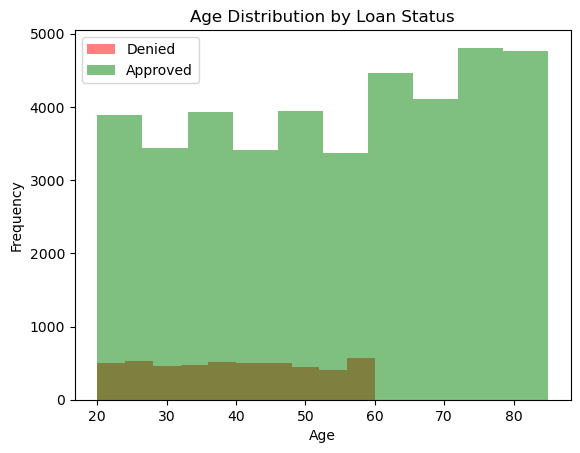

In [42]:
ax = df[df['loan_status']==1]['person_age'].plot(kind='hist', alpha=0.5, color='red', label='Denied')
df[df['loan_status']==0]['person_age'].plot(kind='hist', alpha=0.5, color='green', label='Approved', ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age Distribution by Loan Status')
ax.legend()



Loan Status Counts
This visualization shows how many loans were approved versus denied.

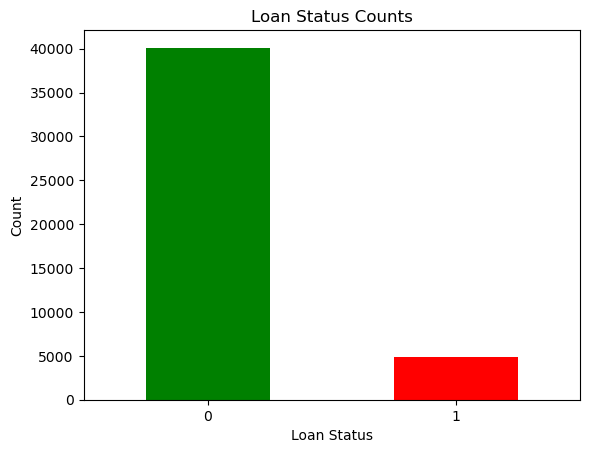

In [43]:
ax = df['loan_status'].value_counts().plot(kind='bar', color=['green', 'red'])
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
ax.set_title('Loan Status Counts')
ax.tick_params(axis='x', rotation=0)



Loan Status by Gender

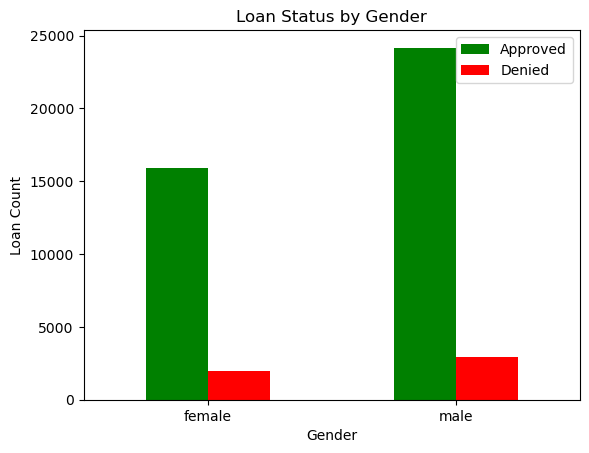

In [44]:
ax = df.groupby(['person_gender', 'loan_status']).size().unstack().plot(kind='bar', color=['green', 'red'])
ax.set_xlabel('Gender')
ax.set_ylabel('Loan Count')
ax.set_title('Loan Status by Gender')
ax.legend(['Approved', 'Denied'])
ax.tick_params(axis='x', rotation=0)


Income

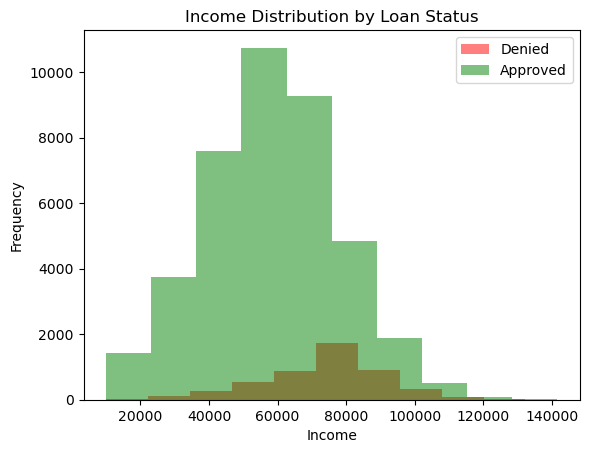

In [45]:
ax = df[df['loan_status']==1]['person_income'].plot(kind='hist', alpha=0.5, color='red', label='Denied')
df[df['loan_status']==0]['person_income'].plot(kind='hist', alpha=0.5, color='green', label='Approved', ax=ax)
ax.set_xlabel('Income')
ax.set_ylabel('Frequency')
ax.set_title('Income Distribution by Loan Status')
ax.legend()



Employment Experience Distribution by Loan Status

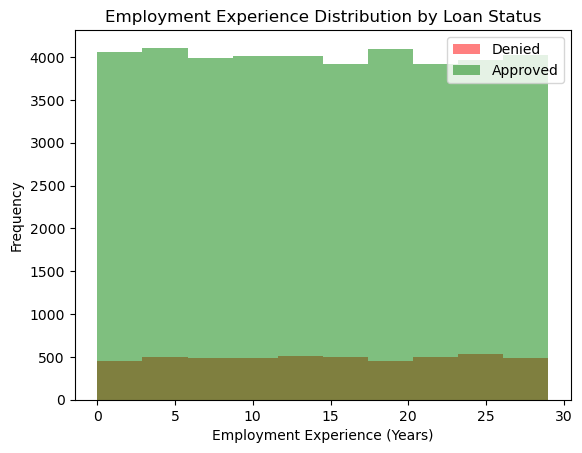

In [46]:
ax = df[df['loan_status']==1]['person_emp_exp'].plot(kind='hist', alpha=0.5, color='red', label='Denied')
df[df['loan_status']==0]['person_emp_exp'].plot(kind='hist', alpha=0.5, color='green', label='Approved', ax=ax)
ax.set_xlabel('Employment Experience (Years)')
ax.set_ylabel('Frequency')
ax.set_title('Employment Experience Distribution by Loan Status')
ax.legend()



Loan Amount Distribution by Loan Status

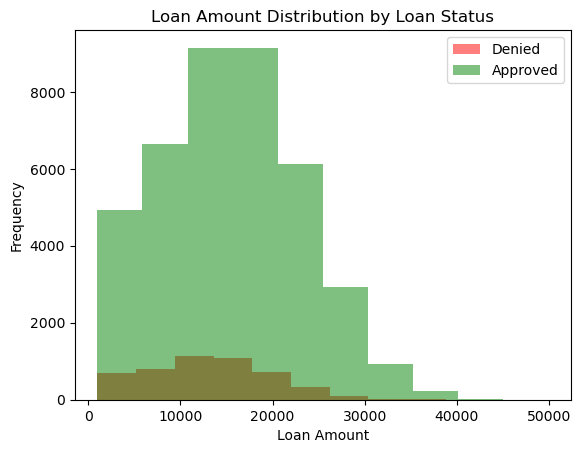

In [47]:
ax = df[df['loan_status']==1]['loan_amnt'].plot(kind='hist', alpha=0.5, color='red', label='Denied')
df[df['loan_status']==0]['loan_amnt'].plot(kind='hist', alpha=0.5, color='green', label='Approved', ax=ax)
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Frequency')
ax.set_title('Loan Amount Distribution by Loan Status')
ax.legend()



Interest Rate Distribution by Loan Status

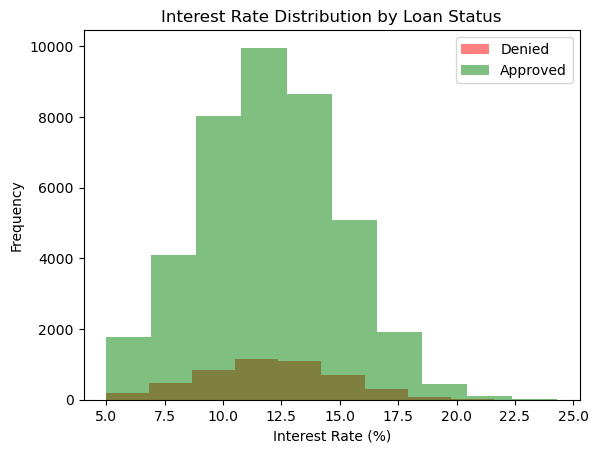

In [48]:
ax = df[df['loan_status']==1]['loan_int_rate'].plot(kind='hist', alpha=0.5, color='red', label='Denied')
df[df['loan_status']==0]['loan_int_rate'].plot(kind='hist', alpha=0.5, color='green', label='Approved', ax=ax)
ax.set_xlabel('Interest Rate (%)')
ax.set_ylabel('Frequency')
ax.set_title('Interest Rate Distribution by Loan Status')
ax.legend()



Credit Score Distribution by Loan Status

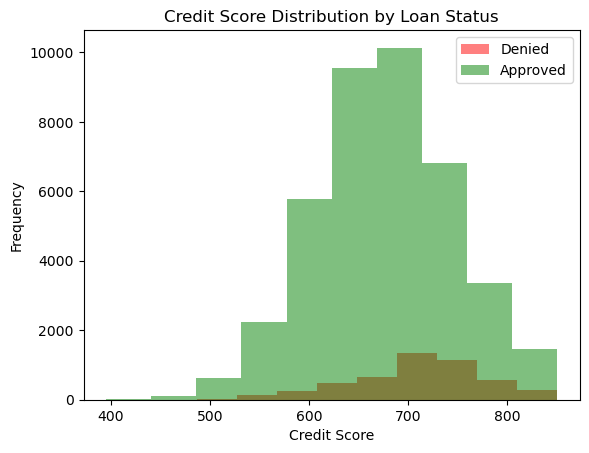

In [49]:
ax = df[df['loan_status']==1]['credit_score'].plot(kind='hist', alpha=0.5, color='red', label='Denied')
df[df['loan_status']==0]['credit_score'].plot(kind='hist', alpha=0.5, color='green', label='Approved', ax=ax)
ax.set_xlabel('Credit Score')
ax.set_ylabel('Frequency')
ax.set_title('Credit Score Distribution by Loan Status')
ax.legend()



Percent of Income Used for Loan vs Loan Status

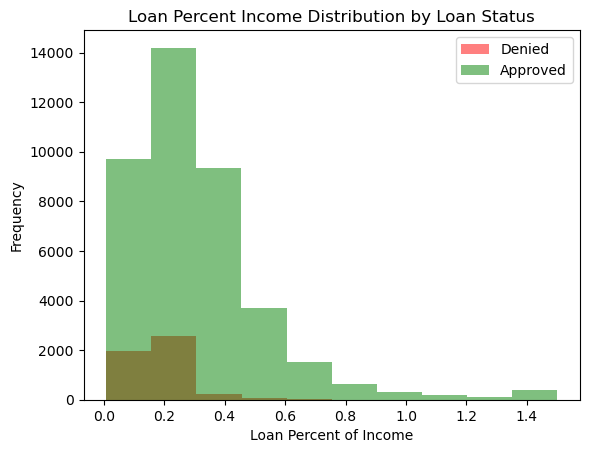

In [50]:
ax = df[df['loan_status']==1]['loan_percent_income'].plot(kind='hist', alpha=0.5, color='red', label='Denied')
df[df['loan_status']==0]['loan_percent_income'].plot(kind='hist', alpha=0.5, color='green', label='Approved', ax=ax)
ax.set_xlabel('Loan Percent of Income')
ax.set_ylabel('Frequency')
ax.set_title('Loan Percent Income Distribution by Loan Status')
ax.legend()



Conclusion:
Based on the visualizations, several features appear to influence loan approval decisions. Age shows a wide distribution, but younger applicants tend to have slightly higher denial rates. Sex does not show a strong difference in approval outcomes, suggesting it may not be a driving factor in the model.

Quantitative features like credit score, interest rate, loan amount, percent of income used, and employment experience show clearer patterns. Approved loans are associated with higher credit scores, lower interest rates, and lower loan-to-income ratios. Applicants with longer employment histories also tend to be approved more often. These trends suggest the model is prioritizing financial stability and risk indicators.

Education level and home ownership status show some variation, but the differences are less pronounced. Loan intent categories like medical or debt consolidation show higher denial rates, which may reflect perceived risk rather than bias.

While the model appears to focus on financial metrics, the inclusion of demographic features like age and sex raises ethical concerns. If these features are influencing decisions in subtle ways, the financial institution could face legal scrutiny. It’s important to ensure that the model’s decisions are explainable and not disproportionately affecting protected groups.